In [2]:
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

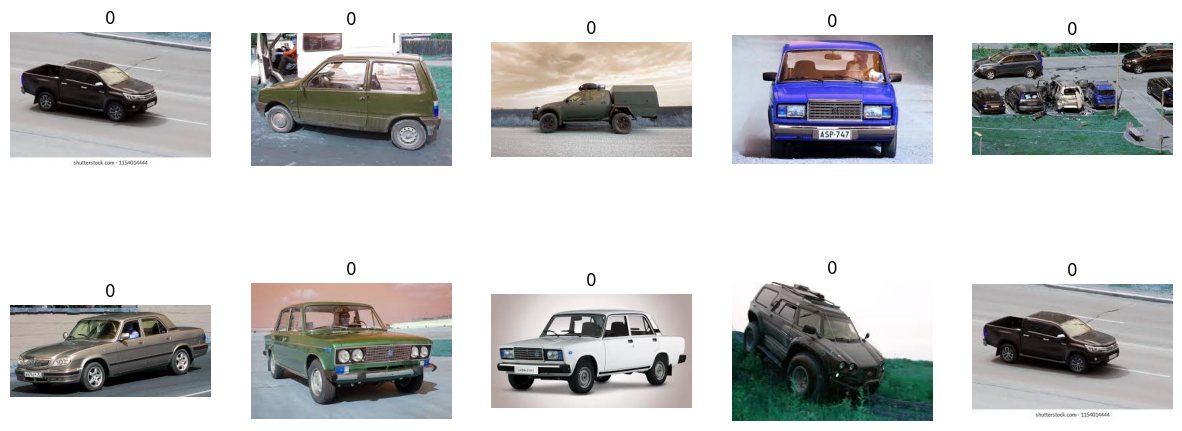

In [3]:
folder = '/content/img'

# Load traffic sign Car
fnames_0 = os.listdir(os.path.join(folder, 'Car'))
images_0 = [cv2.imread(os.path.join(folder, 'Car', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)


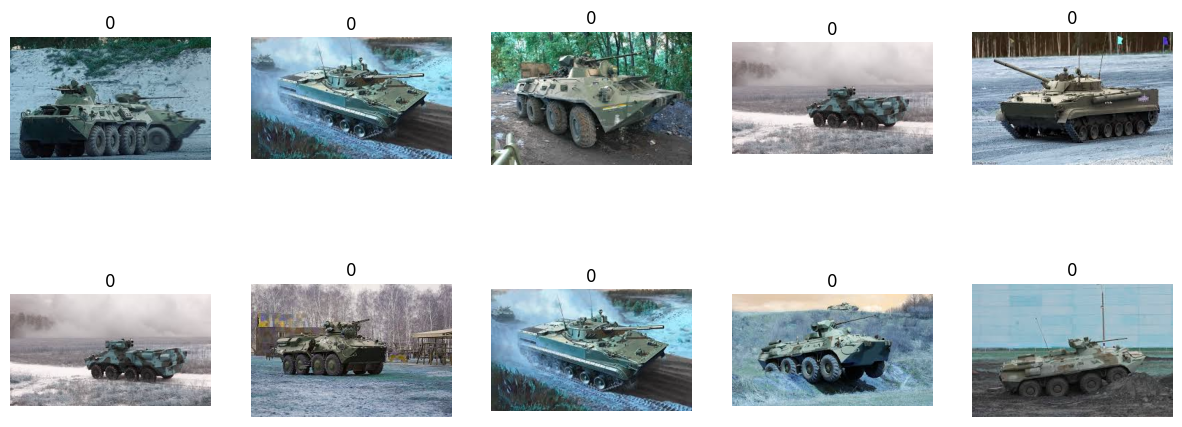

In [4]:
# Load traffic sign IFV
fnames_1 = os.listdir(os.path.join(folder, 'IFV'))
images_1 = [cv2.imread(os.path.join(folder, 'IFV', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [0] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

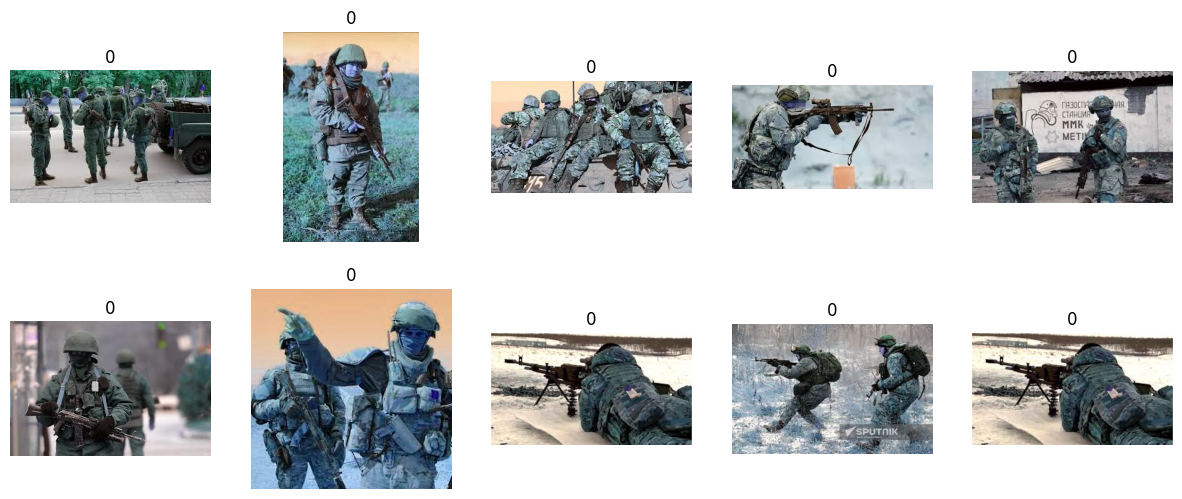

In [5]:
# Load traffic sign Infantry
fnames_2 = os.listdir(os.path.join(folder, 'Infantry'))
images_2 = [cv2.imread(os.path.join(folder, 'Infantry', f), cv2.IMREAD_UNCHANGED) for f in fnames_2]
labels_2 = [0] * len(images_2)

for cnt, idx in enumerate(np.random.randint(0, len(images_2), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_2[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_2[idx]), plt.axis(False)

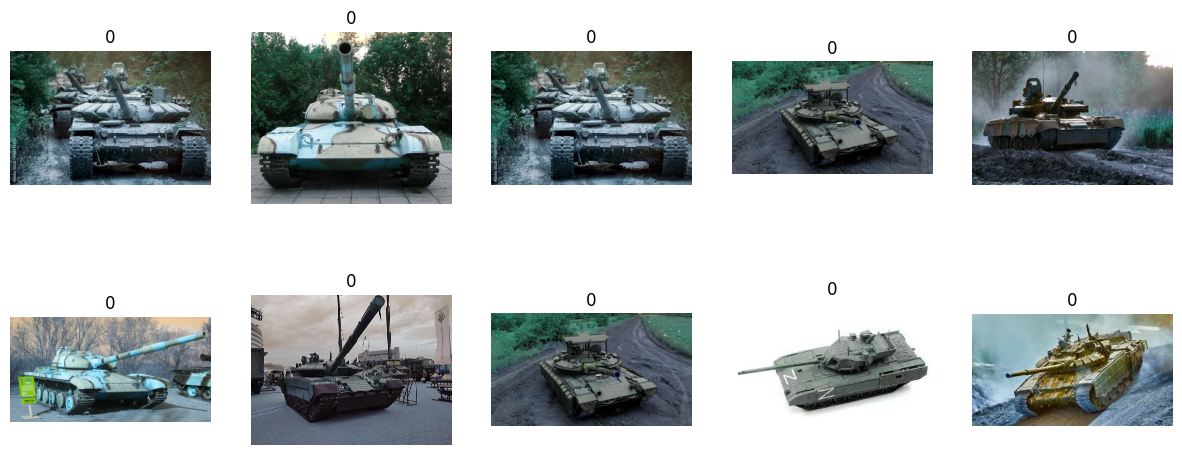

In [6]:
# Load traffic sign Tank
fnames_3 = os.listdir(os.path.join(folder, 'Tank'))
images_3 = [cv2.imread(os.path.join(folder, 'Tank', f), cv2.IMREAD_UNCHANGED) for f in fnames_3]
labels_3 = [0] * len(images_3)

for cnt, idx in enumerate(np.random.randint(0, len(images_3), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_3[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_3[idx]), plt.axis(False)

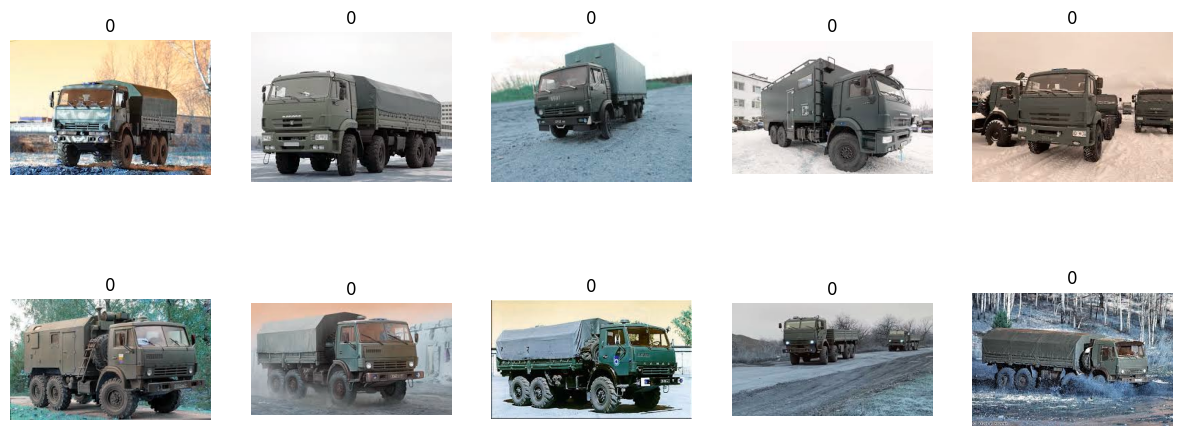

In [7]:
# Load traffic sign Truck
fnames_4 = os.listdir(os.path.join(folder, 'Truck'))
images_4 = [cv2.imread(os.path.join(folder, 'Truck', f), cv2.IMREAD_UNCHANGED) for f in fnames_4]
labels_4 = [0] * len(images_4)

for cnt, idx in enumerate(np.random.randint(0, len(images_4), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_4[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_4[idx]), plt.axis(False)

In [8]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))
print('Num samples class_2', len(images_2))
print('Num samples class_3', len(images_3))
print('Num samples class_4', len(images_4))

Num samples class_0 30
Num samples class_1 31
Num samples class_2 32
Num samples class_3 31
Num samples class_4 31


In [9]:
import numpy as np
from sklearn.utils import shuffle
import cv2

# Приведение изображений к одному размеру
target_size = (64, 64)
images = [cv2.resize(img, target_size) for img in images_0 + images_1 + images_2 + images_3 + images_4]

# Убедитесь, что метки представлены числами
labels = labels_0 + labels_1 + labels_2 + labels_3 + labels_4
labels = [int(label) for label in labels]

# Перемешивание данных
images, labels = shuffle(images, labels)

# Преобразование в массивы NumPy
images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)


Images (155, 64, 64, 3)
Labels (155,)


In [10]:
#Преобразование изображений в масивы пикселей, нормализация изображений приводя значения в диапазон [0,1]
start = time()
pixels = []
for image in images:
    pixels_ = []
    for r in range(image.shape[0]):
        for c in range(image.shape[1]):
            pixels_.append(image[r,c])
    pixels.append(pixels_)

pixels = np.array(pixels)/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (155, 4096, 3)
Elapsed time 0.9806180000305176


In [11]:
start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (155, 12288)
Elapsed time 0.005787372589111328


In [12]:
from sklearn.model_selection import train_test_split

#Разделение данных на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(
    pixels, labels, test_size=0.2, random_state=42  # 20% данных отводится на тест
)

print('Training set shape:', x_train.shape, y_train.shape)
print('Testing set shape:', x_test.shape, y_test.shape)

Training set shape: (124, 12288) (124,)
Testing set shape: (31, 12288) (31,)


In [13]:
from tensorflow.keras.utils import to_categorical

#Кодирование меток с помощью One-hot encoding
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


# ***Создание Модели***

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Определяем модель
model = Sequential([
    Dense(128, activation='relu', input_shape=(12288,)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


# Show the model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │       1,572,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,581,898 (6.03 MB)

 Trainable params: 1,581,898 (6.03 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (124, 10)
y_test shape: (31, 10)


In [20]:
# Подготовка данных
x_train = np.random.rand(1000, 12288)
y_train = np.random.randint(0, 10, 1000)
x_test = np.random.rand(200, 12288)
y_test = np.random.randint(0, 10, 200)

In [21]:

# Проверить и закодировать метки
print("Before encoding: y_train shape =", y_train.shape)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print("After encoding: y_train shape =", y_train.shape)

Before encoding: y_train shape = (1000,)
After encoding: y_train shape = (1000, 10)


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


 #Определение модели
model = Sequential([
    Dense(128, activation='relu', input_shape=(12288,)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


# Компиляция модели
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


# Обучение модели
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=25,
    batch_size=128,
    verbose=2
)

print("Training complete!")

Epoch 1/25
8/8 - 2s - 206ms/step - accuracy: 0.0970 - loss: 4.1681 - val_accuracy: 0.1250 - val_loss: 2.3162
Epoch 2/25
8/8 - 0s - 49ms/step - accuracy: 0.1170 - loss: 2.3210 - val_accuracy: 0.0850 - val_loss: 2.3030
Epoch 3/25
8/8 - 1s - 77ms/step - accuracy: 0.1160 - loss: 2.3023 - val_accuracy: 0.0850 - val_loss: 2.3031
Epoch 4/25
8/8 - 0s - 50ms/step - accuracy: 0.1020 - loss: 2.3021 - val_accuracy: 0.0850 - val_loss: 2.3031
Epoch 5/25
8/8 - 1s - 87ms/step - accuracy: 0.1070 - loss: 2.3011 - val_accuracy: 0.0850 - val_loss: 2.3030
Epoch 6/25
8/8 - 0s - 62ms/step - accuracy: 0.1100 - loss: 2.3031 - val_accuracy: 0.0850 - val_loss: 2.3030
Epoch 7/25
8/8 - 1s - 79ms/step - accuracy: 0.1130 - loss: 2.3019 - val_accuracy: 0.0850 - val_loss: 2.3029
Epoch 8/25
8/8 - 1s - 64ms/step - accuracy: 0.1100 - loss: 2.3018 - val_accuracy: 0.0850 - val_loss: 2.3030
Epoch 9/25
8/8 - 1s - 63ms/step - accuracy: 0.1100 - loss: 2.3016 - val_accuracy: 0.0850 - val_loss: 2.3029
Epoch 10/25
8/8 - 1s - 67ms

In [34]:

model.save('model.keras')  # Сохранение модели